### **Virtual Document Translator**

## **Here the OCR extracts text from detected paper**

In [4]:
!pip install azure-ai-vision-imageanalysis==1.0.0b3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.4/197.4 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 2.5 MB/s eta 0:00:00


In [5]:
!pip install azure-ai-textanalytics==5.3.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.6/298.6 kB 6.6 MB/s eta 0:00:00


In [6]:
!pip install python-dotenv

In [7]:
!pip install azure-ai-translation-text==1.0.0b1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 3.9 MB/s eta 0:00:00


In [8]:
!pip install azure-cognitiveservices-speech

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 MB 27.9 MB/s eta 0:00:00



1: Use Read API for image (error.jpg)
2: Read handwriting (ITI.jpg)
Any other key to quit

Enter a number:1



  Results saved in text.jpg

-------------
output_1727315741.3852773.txt

Installing Docker Desktop 4.33.1 (161083)
-
X
Docker Desktop 4.33.1
Installation failed. One prerequisite is not fulfilled.
We've detected that you have an incompatible version of Windows.
Docker Desktop requires Windows 10 Pro/Enterprise/Home version 19044 or above.
To continue with the installation, upgrade Windows to a supported version and then re-run the installer.
Close

Enter a target language code for translation (for example, 'fr'):
ar
Language: ar

Translation:
تثبيت سطح المكتب Docker 4.33.1 (161083)
-
X
برنامج دوكر ديسك توب 4.33.1
فشل التثبيت. لم يتم الوفاء بأحد الشروط المسبقة.
لقد اكتشفنا أن لديك إصدارا غير متوافق من Windows.
يتطلب Docker Desktop إصدار Windows 10 Pro / Enterprise / Home 19044 أو أعلى.
لمتابعة التثبيت، قم بترقية Windows إلى إصدار معتمد ثم أعد تشغيل المثبت.
غلق

Would you like

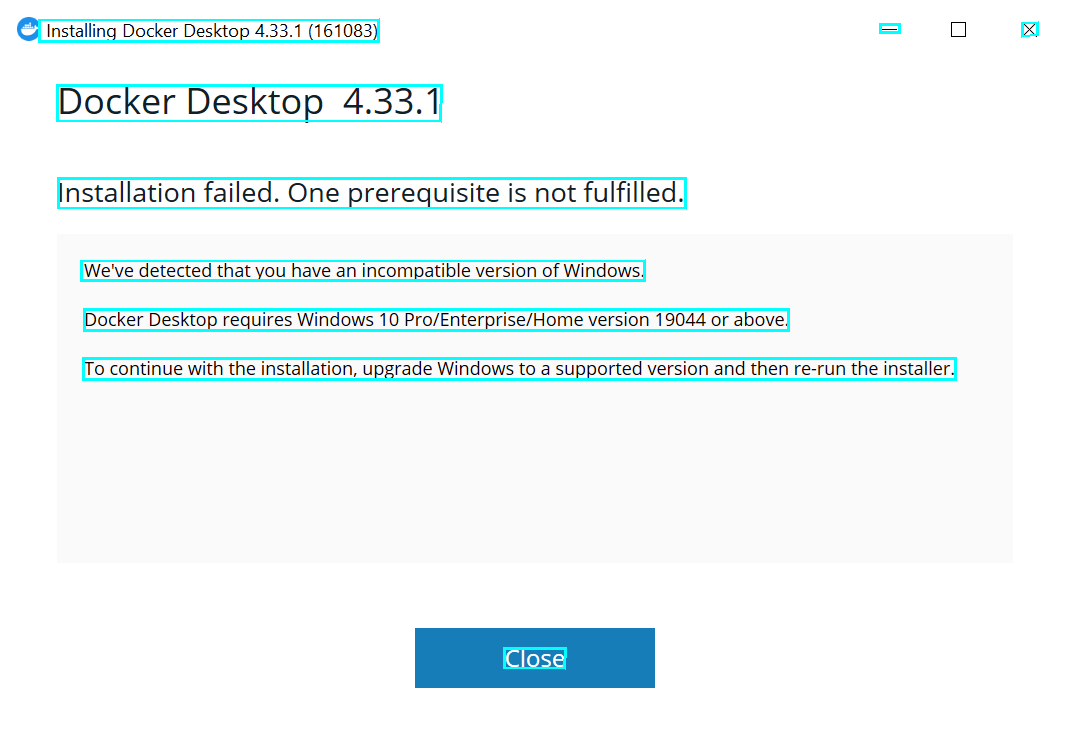

In [ ]:
from dotenv import load_dotenv
import os
import time
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt
import requests, json

# Import namespaces
from azure.ai.vision.imageanalysis import ImageAnalysisClient
from azure.ai.vision.imageanalysis.models import VisualFeatures
from azure.core.credentials import AzureKeyCredential
from azure.ai.translation.text import *
from azure.ai.translation.text.models import InputTextItem

import azure.cognitiveservices.speech as speechsdk
from IPython.display import display, Audio


def main():

    global cv_client
    global translator_endpoint
    global cog_key
    global cog_region
    global client
    global text
    global language
    global translation
    repeat = True


    while repeat:
        try:
           # Get Configuration Settings
           load_dotenv()
           ai_endpoint = "https://final1.cognitiveservices.azure.com/"
           ai_key = "8de58bdd42e54f7499c7c28a7b9e2622"

           cog_key = 'dd4c8df8d8ee4176878a260c7ccca826'
           cog_region ='eastus'
           translator_endpoint = 'https://api.cognitive.microsofttranslator.com'

           #Create client using endpoint and key
           credential = TranslatorCredential(cog_key, cog_region)
           client = TextTranslationClient(credential)

           # Authenticate Azure AI Vision client
           cv_client = ImageAnalysisClient(
           endpoint=ai_endpoint,
           credential=AzureKeyCredential(ai_key)
            )

           # Menu for text reading functions
           print('\n1: Use Read API for image (error.jpg)\n2: Read handwriting (ITI.jpg)\nAny other key to quit\n')
           command = input('Enter a number:')
           if command == '1':
                image_file = ('/content/error.PNG')
                GetTextRead(image_file)
           elif command =='2':
                image_file = ('/content/ITI')
                GetTextRead(image_file)

           # Access the latest created text file
           Content_folder = 'Content_folder'
           all_files = os.listdir(Content_folder)
           # Find the latest file (assuming files are named with timestamps)
           latest_file = max(all_files, key=lambda f: os.path.getctime(os.path.join(Content_folder, f)))

           # Read the file contents
           print('\n-------------\n' + latest_file)
           text = open(os.path.join(Content_folder, latest_file), encoding='utf8').read()
           print('\n' + text)

           # Detect the language
           language = GetLanguage(text)
           print('Language:',language)

           # Translate
           translation = Translate(text, language)
           print("\nTranslation:\n{}".format(translation))

           #Speak up
           reply=input("Would you like to listen to Translated text?(yes/no)")
           if reply.lower() == "yes":
              speak(translation)
           repeat=input("would you like to translate another paper ?(yes/no)")
           if repeat.lower()=='no':
                break
           else:
               continue

        except Exception as ex:
            print(ex)

def GetTextRead(image_file):
    i = 1
    print('\n')

    # Open image file
    with open(image_file, "rb") as f:
        image_data = f.read()

    # Use Analyze image function to read text in image
    result = cv_client.analyze(
        image_data=image_data,
        visual_features=[VisualFeatures.READ]
    )

    # Display the image and overlay it with the extracted text
    if result.read is not None:
        #print("\nText:")

        # Prepare image for drawing
        image = Image.open(image_file)
        fig = plt.figure(figsize=(image.width/100, image.height/100))
        plt.axis('off')
        draw = ImageDraw.Draw(image)
        color = 'cyan'

         #Create a text file with the resulted text
        os.makedirs('Content_folder', exist_ok = True)
        with open(f"/content/Content_folder/output_{time.time()}.txt", "w") as f:
          for line in result.read.blocks[0].lines:
               # Return the text detected in the image
            #print(f"  {line.text}")


            r = line.bounding_polygon
            bounding_polygon = ((r[0].x, r[0].y),(r[1].x, r[1].y),(r[2].x, r[2].y),(r[3].x, r[3].y))


            # Draw line bounding polygon
            draw.polygon(bounding_polygon, outline=color, width=3)




            # Iterate over recognized lines of text

            # Write each line to the file
            f.write(line.text)
            # Add a newline character after each line
            f.write("\n")


    # Save image
    plt.imshow(image)
    plt.tight_layout(pad=0)
    outputfile = 'text.jpg'
    fig.savefig(outputfile)
    print('\n  Results saved in', outputfile)

def GetLanguage(text):
    #Use the Azure AI Translator detect function
    # Choose target language
    languagesResponse = client.get_languages(scope="translation")
    #print("{} languages supported.".format(len(languagesResponse.translation)))
    print("Enter a target language code for translation (for example, 'fr'):")
    targetLanguage = "xx"
    supportedLanguage = False
    while supportedLanguage == False:
       targetLanguage = input()
       if  targetLanguage in languagesResponse.translation.keys():
           supportedLanguage = True
       else:
        print("{} is not a supported language.".format(targetLanguage))

    # Return the language
    return targetLanguage

def Translate(text, targetLanguage):

    # Use the Azure AI Translator translate function
    input_text_elements = [InputTextItem(text=text)]
    translationResponse = client.translate(content=input_text_elements, to=[targetLanguage])
    translation = translationResponse[0].translations[0].text if translationResponse else None

    # Return the translation
    return translation

def speak(text):
      # This example requires environment variables named "SPEECH_KEY" and "SPEECH_REGION"
      speech_config = speechsdk.SpeechConfig(subscription='2b9659352e704d1fbaab2fc10de5e226', region='eastus')
      audio_config = speechsdk.audio.AudioOutputConfig(use_default_speaker=True)

     # The neural multilingual voice can speak different languages based on the input text.
      speech_config.speech_synthesis_voice_name='en-US-AvaMultilingualNeural'

      speech_synthesizer = speechsdk.SpeechSynthesizer(speech_config=speech_config, audio_config=audio_config)


      speech_synthesis_result = speech_synthesizer.speak_text_async(text).get()
      stream = speechsdk.AudioDataStream(speech_synthesis_result)
      stream.save_to_wav_file("speech.wav")

      if speech_synthesis_result.reason == speechsdk.ResultReason.SynthesizingAudioCompleted:
         print("Speech synthesized for text [{}]".format(text))
         display(Audio(filename="speech.wav", autoplay=True))

      elif speech_synthesis_result.reason == speechsdk.ResultReason.Canceled:
        cancellation_details = speech_synthesis_result.cancellation_details
        if cancellation_details is not None:
           print("Speech synthesis canceled: {}".format(cancellation_details.reason))
           if cancellation_details.reason == speechsdk.CancellationReason.Error:
              if cancellation_details.error_details:
                print("Error details: {}".format(cancellation_details.error_details))
                print("Did you set the speech resource key and region values?")


if __name__ == "__main__":
    main()

### **UI**

In [ ]:
!pip install ipywidgets==8.0.6

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.3/138.3 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 82.9 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.9
    Uninstalling widgetsnbextension-3.6.9:
      Successfully uninstalled widgetsnbextension-3.6.9
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [ ]:
import ipywidgets as widgets
from IPython.display import display
import io
from PIL import Image
import time

# ... (rest of your existing code)

# Create a file upload widget
uploader = widgets.FileUpload(
    accept='image/*',
    multiple=False
)

# Create a dropdown for language selection
language_dropdown = widgets.Dropdown(
    options=['fr', 'es', 'de', 'it','en'],
    description='Target Language:'
)

# Create a button to trigger translation
translate_button = widgets.Button(description="Translate")

# Create a checkbox for listening to the translation
listen_checkbox = widgets.Checkbox(
    value=False,
    description='Listen to Translation',
    disabled=False,
    indent=False
)

# Create an output widget to display results
output = widgets.Output()

# Define the on_click function for the button
def on_translate_button_clicked(b):
    with output:
        output.clear_output()
        if uploader.value:
            # ... (image processing and text extraction code remains the same)
            target_language = language_dropdown.value
            # Translate the text
            translation = Translate(text, target_language)
            print("\nTranslation:\n{}".format(translation))

            # Speak the translation if the checkbox is checked
            if listen_checkbox.value:
                speak(translation)

# Attach the on_click function to the button
translate_button.on_click(on_translate_button_clicked)

# Display the widgets
display(uploader, language_dropdown, translate_button, listen_checkbox, output)

FileUpload(value={}, accept='image/*', description='Upload')

Dropdown(description='Target Language:', options=('fr', 'es', 'de', 'it', 'en'), value='fr')

Button(description='Translate', style=ButtonStyle())

Checkbox(value=False, description='Listen to Translation', indent=False)

Output()

**Streamlit**

In [18]:
!pip install streamlit --upgrade

In [64]:
! pip install streamlit -q
!wget -q -O - ipv4.icanhazip.com

104.196.177.205


In [65]:
! streamlit run Azure.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://104.196.177.205:8501

your url is: https://stale-walls-sort.loca.lt
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
Speech synthesized for text [Ce site n’est pas joignable
127.0.0.1 a refusé de se connecter.
Essayer:
. V